# Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


# Load Dataset of Malaria

In [3]:
os.listdir( "cell-images-for-detecting-malaria/cell_images/train" )

['Parasitized', 'Uninfected']

# Visualization of Parasitized and Uninfected

Text(0.5, 1.0, 'Paratsitized Cell Image')

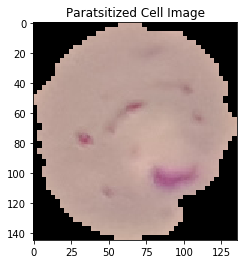

In [5]:
Parasitized  = image.load_img('cell-images-for-detecting-malaria/cell_images/train/Parasitized/C39P4thinF_original_IMG_20150622_110115_cell_114.png')
plt.imshow(Parasitized)
plt.title('Paratsitized Cell Image')

Text(0.5, 1.0, 'Uninfected Cell Image')

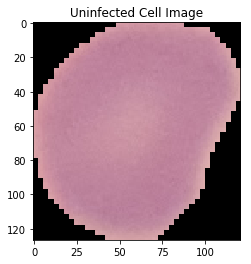

In [6]:
Uninfected = image.load_img('cell-images-for-detecting-malaria/cell_images/train/Uninfected/C6NThinF_IMG_20150609_121955_cell_54.png')
plt.imshow(Uninfected)
plt.title('Uninfected Cell Image')

# Rescaling &

# Training data, Validation data, Test Data 

In [10]:
traindata = ImageDataGenerator(rescale=1/255)
trainingdata = traindata.flow_from_directory('cell-images-for-detecting-malaria/cell_images/train',
                                             batch_size=32,
                                             target_size=(128,128),
                                             class_mode=('binary')
                                             )
testdata = ImageDataGenerator(rescale=1/255)
validationdata =testdata.flow_from_directory('cell-images-for-detecting-malaria/cell_images/val',
                                             batch_size=32,
                                             target_size=(128,128),
                                             class_mode=('binary'))
testingdata = testdata.flow_from_directory('cell-images-for-detecting-malaria/cell_images/test',
                                           batch_size= 32,
                                           target_size= (128,128),
                                           class_mode ='binary')

Found 19290 images belonging to 2 classes.
Found 2754 images belonging to 2 classes.
Found 5514 images belonging to 2 classes.


# Build CNN model

In [29]:
cnn = Sequential()
cnn.add(Conv2D(128,(3,3),activation='relu', input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size =(2,2)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size =(2,2)))
cnn.add(Flatten())
cnn.add(Dense(activation ='relu' ,units =64) )
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 32)        36896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                1843264   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total para

# Data feeds to CNN model with 20 epochs

In [13]:
cnn_model = cnn.fit_generator(trainingdata,
                         steps_per_epoch = 150,
                         epochs = 20,
                         validation_data = validationdata,
                         validation_steps = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
150/150 [==============================] - 128s 855ms/step - loss: 0.6922 - acc: 0.5919 - val_loss: 1.3300 - val_acc: 0.3443
Epoch 2/20
150/150 [==============================] - 108s 718ms/step - loss: 0.5680 - acc: 0.7146 - val_loss: 1.3261 - val_acc: 0.3043
Epoch 3/20
150/150 [==============================] - 97s 649ms/step - loss: 0.3646 - acc: 0.8606 - val_loss: 2.9377 - val_acc: 0.1670
Epoch 4/20
150/150 [==============================] - 97s 647ms/step - loss: 0.2872 - acc: 0.8923 - val_loss: 2.7054 - val_acc: 0.0960
Epoch 5/20
150/150 [==============================] - 86s 576ms/step - loss: 0.2129 - acc: 0.9268 - val_loss: 2.5462 - val_acc: 0.1121
Epoch 6/20
150/150 [==============================] - 88s 584ms/step - loss: 0.2102 - acc: 0.9225 - val_loss: 3.5830 - val_acc: 0.0970
Epoch 7/20
150/150 [==============================] - 86s 572ms/step - loss: 0.1928 - acc: 0.9310 - val_loss: 3.9805 - val_acc: 0.0751
Epoch

# Test Accuracy

In [18]:
test_accu = cnn.evaluate_generator(testingdata,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 93.89356093812471 %


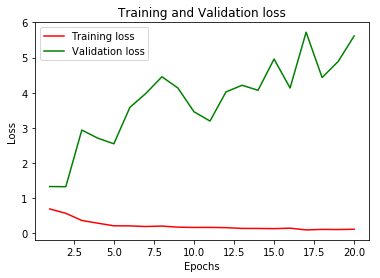

In [30]:
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

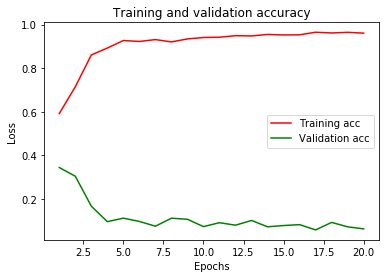

In [20]:
acc = cnn_model.history['acc']
val_acc = cnn_model.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing image

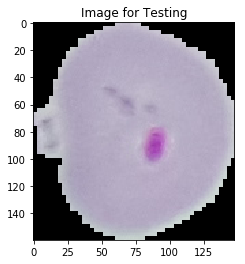

In [31]:
test_image = image.load_img('cell-images-for-detecting-malaria/cell_images/test/Parasitized/C175P136NThinF_IMG_20151127_141253_cell_258.png')
plt.imshow(test_image)
plt.title('Image for Testing')
test_image = test_image.resize((128, 128), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Pridiction for Testing Image

In [32]:
value = cnn.predict(test_image)

In [33]:
value

array([[0.99999523]], dtype=float32)

In [34]:

if value[0][0]==1:
    print("Uninfected")
else:
    print("Parasitized")

Parasitized
